In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, f1_score
from sklearn.mixture import GaussianMixture as EM
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as RCA
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

from  utils import load_credit_card_data, load_hotel_booking_data, learning_Curve, plot_learning_curve, plot_learning_curve_time, compare_fit_time, compare_pred_time
from collections import defaultdict

In [4]:
# load data

In [5]:
cc_data = pd.read_csv('./Credit Card Customer Data.csv')

In [6]:
cc_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
cc_data.shape

(660, 7)

In [8]:
# Exploratory data analysis 

In [9]:
cc_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [10]:
cc_data.info()
#no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2f8b7f370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2f8b7f9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2f8b65ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2f8b8d130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2f8b8d4c0>],
 'means': []}

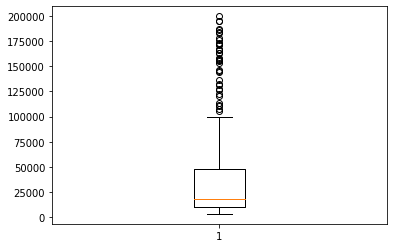

In [11]:
# stats.probplot(cc_data['Avg_Credit_Limit'], dist = "norm", plot = plt)

plt.boxplot(cc_data['Avg_Credit_Limit'])

In [12]:
def plot_distribution(dataframe, col):
    plt.figure(figsize = (20,6))
    # histogram
    plt.subplot(1,3,1)
    dataframe[col].hist()
    plt.title('{} Histogram distribution'.format(col))
    # qq plot
    plt.subplot(1,3,2)
    stats.probplot(dataframe[col], dist = "norm", plot = plt)
    # boxplot 
    plt.subplot(1,3,3)
    plt.boxplot(dataframe[col])
    plt.grid(True)
    plt.title('{} box plot distribution'.format(col))

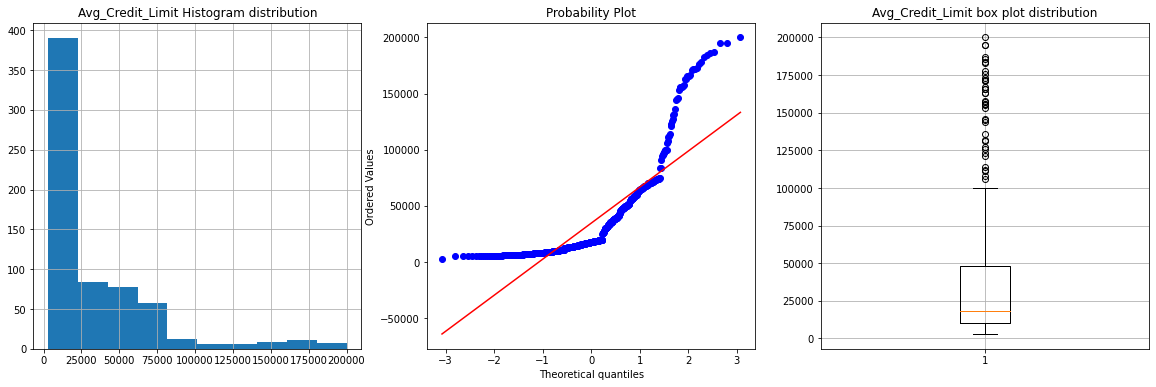

In [13]:
plot_distribution(cc_data, 'Avg_Credit_Limit')

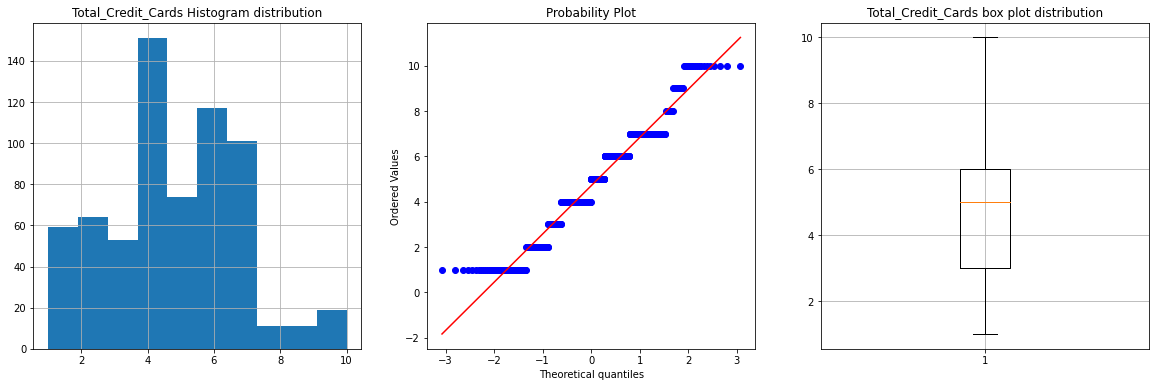

In [14]:
plot_distribution(cc_data, 'Total_Credit_Cards')

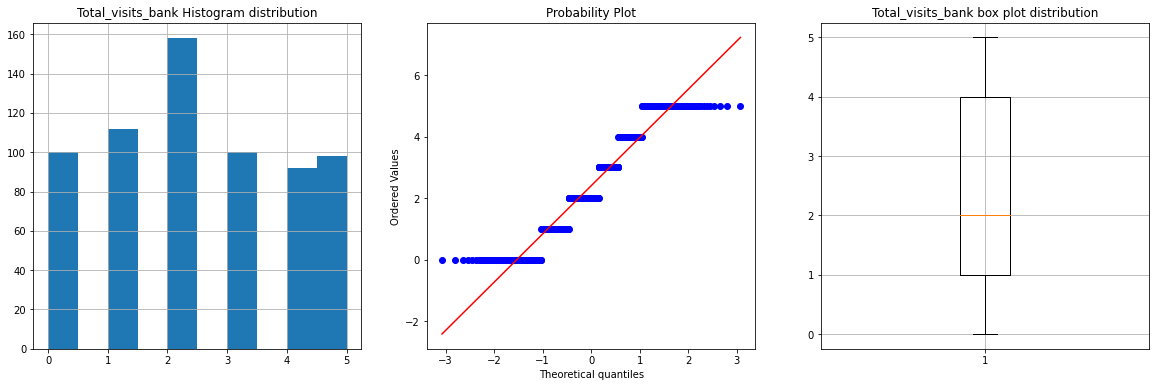

In [15]:
plot_distribution(cc_data, 'Total_visits_bank')

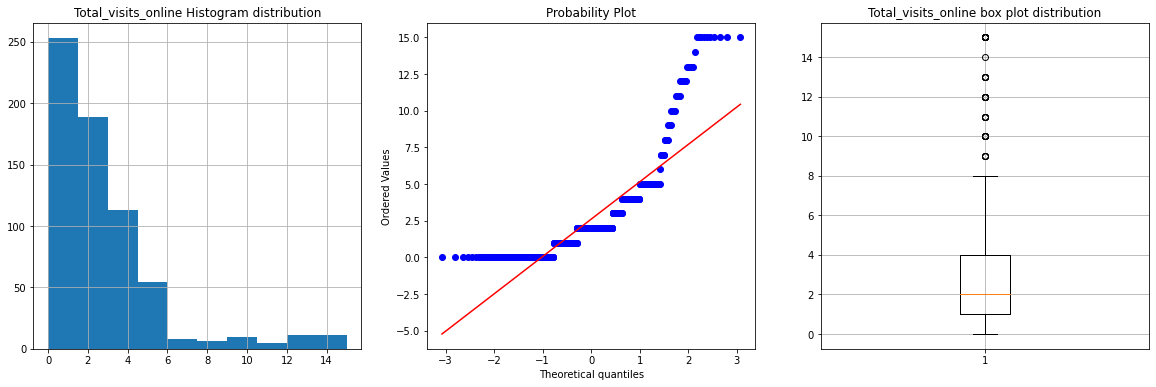

In [16]:
plot_distribution(cc_data, 'Total_visits_online')

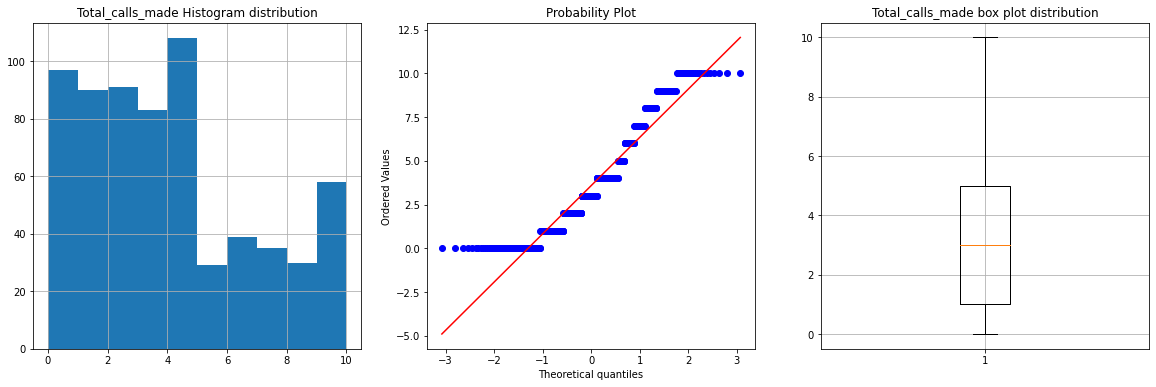

In [17]:
plot_distribution(cc_data, 'Total_calls_made')

In [18]:
# correlation matrix 

In [19]:
cc_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<AxesSubplot:>

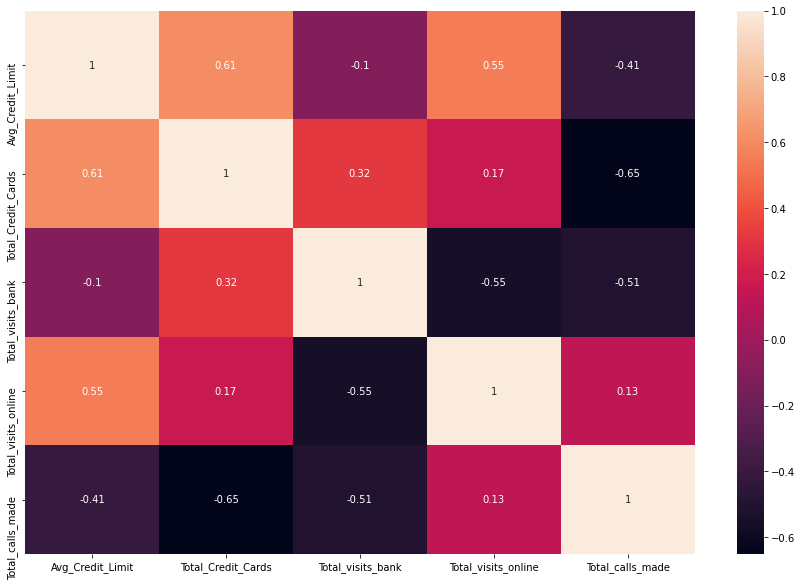

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(cc_data.iloc[:, 2:].corr(), annot=True)

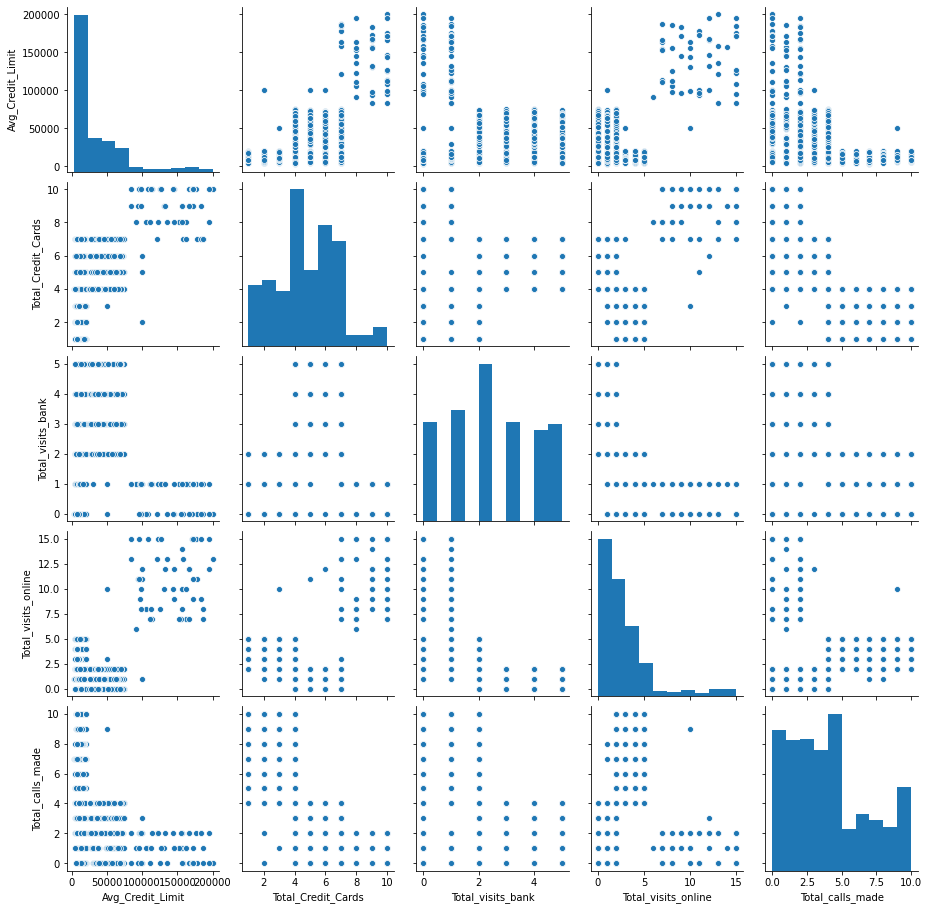

In [21]:
sns.pairplot(cc_data.iloc[:, 2:])

In [ ]:
# mix-max scale the data between 0 and 1

# scaled_cc_data = minmax_scaling(cc_data.iloc[:, 2:], columns=[0])


In [73]:
# K-means

In [45]:
X_cc = cc_data.iloc[:, 2:]

In [174]:
def run_k_means(X,dataset_name):
    ss = []
    for i in range(1, 10):
        km = KMeans(n_clusters = i, init = 'k-means++', random_state = 1, n_init=10, max_iter=300)
        # n_cluster: set of cluster number; 
        # n_init: to run the kmeans n times independently with different random centroids thus minimize SSE; 
        # max_iter: maximum number of iterations for each single run
        km.fit(X)
        ss.append(km.inertia_) # Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    plt.plot(range(1, 10), ss, marker = 'o')
    plt.title('K-means Elbow Method - {}'.format(dataset_name))
    plt.xlabel('Number of clusters')
    plt.ylabel('SS')
    plt.show()


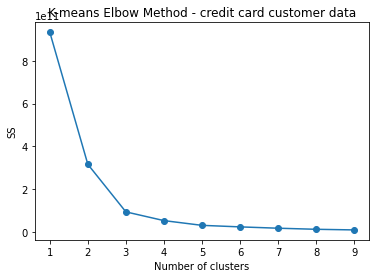

In [175]:
run_k_means(X_cc, 'credit card customer data')

In [236]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1, n_init=10, max_iter=300)
y_kmeans = km.fit_predict(X_cc)

In [81]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 3)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X_cc, y_kmeans), 3)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.717
Calinski Harabasz Score : 2938.569


In [242]:
X_cc['k_means_cluster'] = y_kmeans

<ipython-input-242-97e9602d0418>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cc['k_means_cluster'] = y_kmeans


In [243]:
X_cc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,k_means_cluster
0,100000,2,1,1,0,2
1,50000,3,0,10,9,2
2,50000,7,1,3,4,2
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [244]:
X_cc.groupby('k_means_cluster')[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
k_means_cluster,,,,,
0,14400.452489,3.932127,2.242081,2.280543,4.436652
1,155473.684211,8.763158,0.605263,10.947368,1.000000
2,58588.888889,5.750000,3.177778,1.644444,2.033333


# Load hotel booking data 

In [250]:
# load hotel booking data
X_hotel, y_hotel = load_hotel_booking_data("./hotel_bookings.csv", sample_rate=0.2)
# X_hotel_train, X_hotel_test, y_hotel_train, y_hotel_test = train_test_split(X_hotel, y_hotel, test_size=0.3, random_state=0)

In [251]:
X_hotel = X_hotel.iloc[:, 1:]

In [252]:
X_hotel.shape

(23878, 24)

In [253]:
X_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23878 entries, 0 to 23877
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           23878 non-null  int64  
 1   arrival_date_month_new          23878 non-null  int64  
 2   arrival_date_week_number        23878 non-null  int64  
 3   arrival_date_day_of_month       23878 non-null  int64  
 4   market_segment                  23878 non-null  int64  
 5   distribution_channel            23878 non-null  int64  
 6   is_repeated_guest               23878 non-null  int64  
 7   assigned_room_type              23878 non-null  int64  
 8   deposit_type                    23878 non-null  int64  
 9   customer_type                   23878 non-null  int64  
 10  index                           23878 non-null  int64  
 11  lead_time                       23878 non-null  float64
 12  stays_in_weekend_nights         

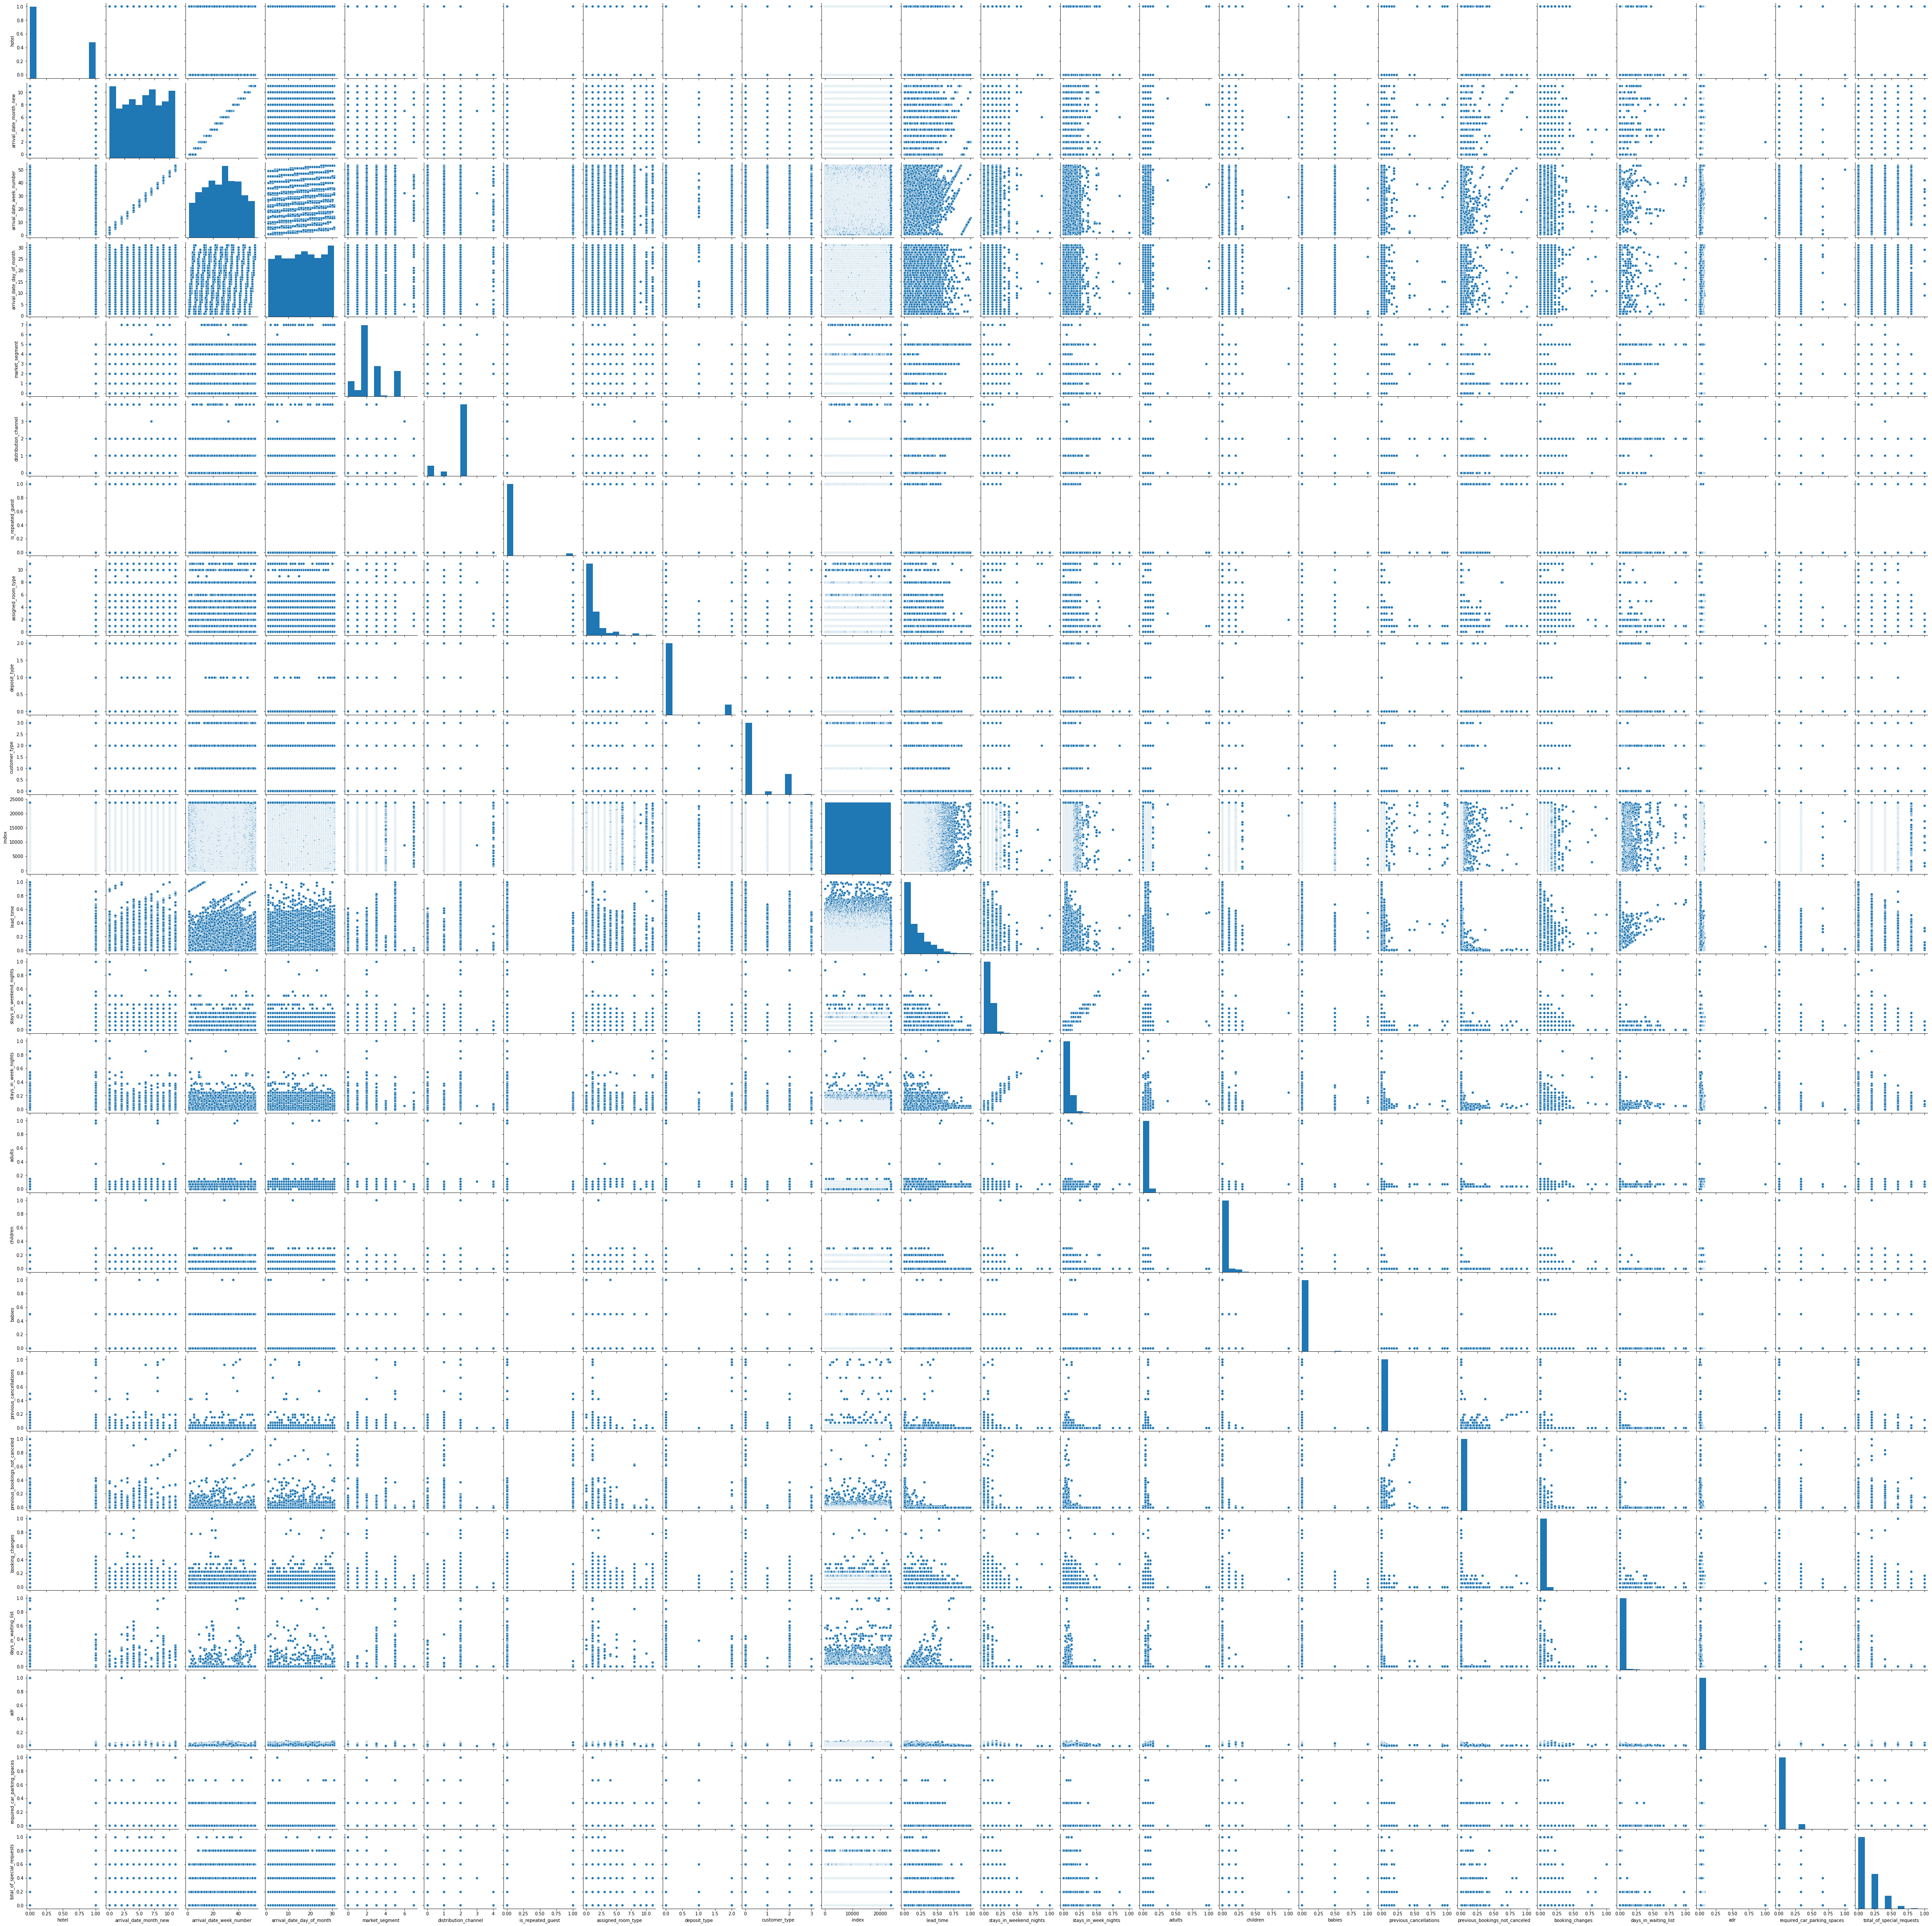

In [254]:
sns.pairplot(X_hotel)

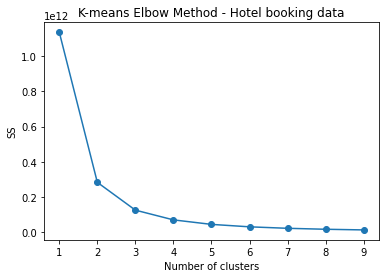

In [220]:
run_k_means(X_hotel, 'Hotel booking data')

In [255]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1, n_init=10, max_iter=300)
y_kmeans = km.fit_predict(X_hotel)

In [256]:
type(y_kmeans)

numpy.ndarray

In [257]:
X_hotel.shape

(23878, 24)

In [258]:
X_hotel.head()

,hotel,arrival_date_month_new,arrival_date_week_number,arrival_date_day_of_month,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,deposit_type,customer_type,...,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,1,4,19,6,3,2,0,1,0,0,...,0.074074,0.0,0.0,0.000000,0.0,0.0,0.0,0.006956,0.0,0.0
1,0,7,35,31,2,2,0,1,0,0,...,0.074074,0.0,0.0,0.000000,0.0,0.0,0.0,0.015944,0.0,0.0
2,0,7,34,17,5,2,0,1,2,2,...,0.074074,0.0,0.0,0.038462,0.0,0.0,0.0,0.011481,0.0,0.0
3,0,4,22,28,2,2,0,2,0,0,...,0.074074,0.0,0.0,0.000000,0.0,0.0,0.0,0.024648,0.0,0.2
4,0,7,35,26,5,2,0,1,2,2,...,0.074074,0.0,0.0,0.038462,0.0,0.0,0.0,0.011481,0.0,0.0


In [259]:
X_hotel_k_means_cluster = X_hotel

In [260]:
X_hotel_k_means_cluster['km_cluster'] = y_kmeans

In [261]:
X_hotel_k_means_cluster.head()

,hotel,arrival_date_month_new,arrival_date_week_number,arrival_date_day_of_month,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,deposit_type,customer_type,...,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,km_cluster
0,1,4,19,6,3,2,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.006956,0.0,0.0,2
1,0,7,35,31,2,2,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.015944,0.0,0.0,2
2,0,7,34,17,5,2,0,1,2,2,...,0.0,0.0,0.038462,0.0,0.0,0.0,0.011481,0.0,0.0,2
3,0,4,22,28,2,2,0,2,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.024648,0.0,0.2,2
4,0,7,35,26,5,2,0,1,2,2,...,0.0,0.0,0.038462,0.0,0.0,0.0,0.011481,0.0,0.0,2


In [262]:
X_hotel_k_means_cluster.groupby('km_cluster')[['market_segment', 'is_repeated_guest', 'assigned_room_type', 'deposit_type', 'customer_type', 'children', 'babies', 'previous_cancellations',
'previous_bookings_not_canceled']].mean()

,market_segment,is_repeated_guest,assigned_room_type,deposit_type,customer_type,children,babies,previous_cancellations,previous_bookings_not_canceled
km_cluster,,,,,,,,,
0,2.474431,0.031411,1.706496,0.246639,0.476944,0.010629,0.003832,0.003252,0.001781
1,2.464371,0.034314,1.731622,0.245711,0.457733,0.010470,0.003757,0.003593,0.002481
2,2.504916,0.026216,1.714016,0.255987,0.479960,0.010134,0.004474,0.003253,0.001874


In [208]:
X_hotel['cluster'] = y_kmeans

In [209]:
X_hotel.head()

,hotel,arrival_date_month_new,arrival_date_week_number,arrival_date_day_of_month,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,deposit_type,customer_type,...,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,cluster
0,1,4,19,6,3,2,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.006956,0.0,0.0,2
1,0,7,35,31,2,2,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.015944,0.0,0.0,2
2,0,7,34,17,5,2,0,1,2,2,...,0.0,0.0,0.038462,0.0,0.0,0.0,0.011481,0.0,0.0,2
3,0,4,22,28,2,2,0,2,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.024648,0.0,0.2,2
4,0,7,35,26,5,2,0,1,2,2,...,0.0,0.0,0.038462,0.0,0.0,0.0,0.011481,0.0,0.0,2


In [213]:
X_hotel = pd.get_dummies(X_hotel, prefix=['cluster'], columns=['cluster'])

In [215]:
X_hotel.shape

(23878, 27)

In [214]:
len(y_hotel)

23878

In [206]:
pd.DataFrame(y_kmeans)

,0
0,2
1,2
2,2
3,2
4,2
...,...
23873,1
23874,1
23875,1
23876,1


In [40]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X_hotel, y_kmeans), 3)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X_hotel, y_kmeans), 3)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.59
Calinski Harabasz Score : 95492.751


# EM Clustering 

In [177]:
def run_em(X, dataset):
    sil_scores = []
    for i in range(2, 10):
        em = EM(n_components=i,covariance_type='full',n_init=1,random_state=100).fit(X)
        cluster_labels = em.predict(X)
        sil_scores.append(silhouette_score(X, cluster_labels))
        
    # elbow curve for silhouette score
    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    plt.plot(range(2,10), sil_scores, marker = 'o')
    plt.grid(True)
    plt.xlabel('Number of Gassian distributions')
    plt.ylabel('Silhouette Score')
    plt.title('EM Silhouette Score by cluster number Chart - {}'.format(dataset))
    plt.show()
   

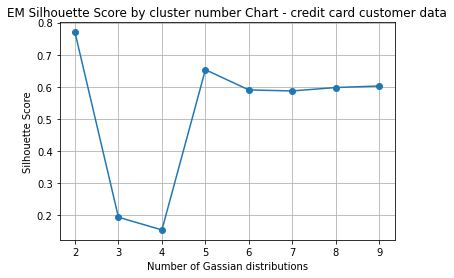

In [178]:
run_em(X_cc, 'credit card customer data')

In [245]:
em = EM(n_components=2,covariance_type='full',n_init=1,random_state=100).fit(X_cc)
cluster_labels = em.predict(X_cc)

In [247]:
X_cc_em_feature = X_cc

In [248]:
X_cc_em_feature['em_cluster'] = cluster_labels

In [249]:
X_cc_em_feature.groupby('em_cluster')[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
em_cluster,,,,,
0,25725.779967,4.379310,2.553366,1.927750,3.794745
1,140235.294118,8.607843,0.607843,10.705882,1.058824


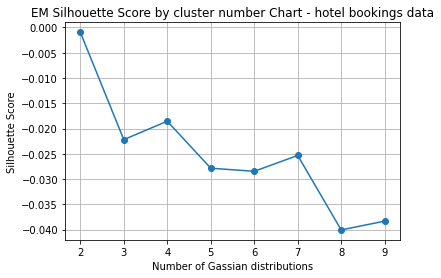

In [179]:
run_em(X_hotel, 'hotel bookings data')

In [222]:
em = EM(n_components=2,covariance_type='full',n_init=1,random_state=100).fit(X_hotel)

In [223]:
cluster_labels = em.predict(X_hotel)

In [224]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [226]:
X_hotel_em_feature = X_hotel.drop(['cluster_0', 'cluster_1', 'cluster_2'], axis=1)

In [228]:
X_hotel_em_feature['em_cluster'] = cluster_labels

In [229]:
X_hotel_em_feature.head()

,hotel,arrival_date_month_new,arrival_date_week_number,arrival_date_day_of_month,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,deposit_type,customer_type,...,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,em_cluster
0,1,4,19,6,3,2,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.006956,0.0,0.0,0
1,0,7,35,31,2,2,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.015944,0.0,0.0,0
2,0,7,34,17,5,2,0,1,2,2,...,0.0,0.0,0.038462,0.0,0.0,0.0,0.011481,0.0,0.0,0
3,0,4,22,28,2,2,0,2,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.024648,0.0,0.2,0
4,0,7,35,26,5,2,0,1,2,2,...,0.0,0.0,0.038462,0.0,0.0,0.0,0.011481,0.0,0.0,0


In [230]:
X_hotel_em_feature.shape

(23878, 25)

# Dimension reduction algorithm 

## PCA 

In [112]:
# from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler

def run_PCA(X):
    pca = PCA(random_state=1024).fit(X)
    explained_cum_var = np.cumsum(pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_)
    explained_cum_var = [round(var, 4) for var in list(explained_cum_var)]
    # print(list(range(1,len(pca.explained_variance_ratio_)+1)))
    plt.plot(list(range(1, len(pca.explained_variance_ratio_)+1)), explained_cum_var, 'bo-')
    plt.xlabel('Principal Components number')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA expained variance by principle component')
    plt.grid(True)
    # ax = plt.figure().gca()
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()
    

[0.45736578 0.37426483 0.06401348 0.0555688  0.04878711]


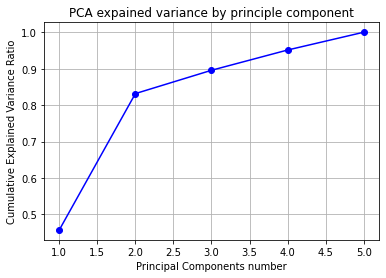

In [113]:
X_cc_standardized = StandardScaler().fit_transform(X_cc)
run_PCA(X_cc_standardized)

[1.11663324e-01 8.97450223e-02 7.65417514e-02 6.53811061e-02
 5.43711720e-02 5.11140761e-02 4.70999472e-02 4.45516066e-02
 4.24733730e-02 4.14924248e-02 4.11401400e-02 4.00420707e-02
 3.77624414e-02 3.60371822e-02 3.42209652e-02 3.20232125e-02
 2.94987700e-02 2.65765312e-02 2.53153549e-02 2.28701980e-02
 2.07645651e-02 1.89090543e-02 1.03832369e-02 2.24738850e-05]


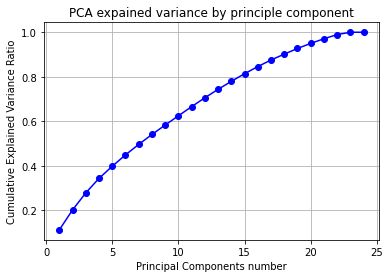

In [115]:
X_hotel_standardized = StandardScaler().fit_transform(X_hotel)
run_PCA(X_hotel_standardized)

## ICA

In [120]:
def run_ICA(X):
    ncomps = list(range(2, X.shape[1]))
    kurtosis = []
    for ncomp in ncomps:
        ica = ICA(n_components=ncomp, random_state=1024)
        X_ica = ica.fit_transform(X)
        X_ica = pd.DataFrame(X_ica)
        kurtosis.append(X_ica.kurt(axis=0).abs().mean())

    plt.plot(ncomps, kurtosis, 'b-')
    plt.title("ICA Kurtosis")
    plt.xlabel("Independent Components")
    plt.ylabel("Average Kurtosis for IC")
    plt.grid(True)
    plt.show()



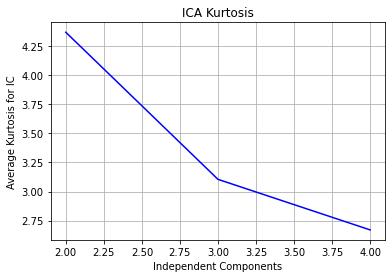

In [121]:
X_cc_standardized = StandardScaler().fit_transform(X_cc)
run_ICA(X_cc_standardized)

/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


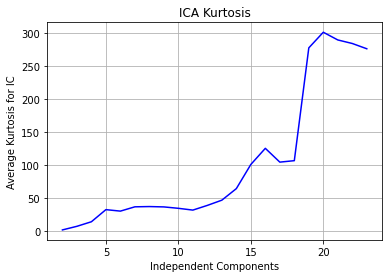

In [122]:
X_hotel_standardized = StandardScaler().fit_transform(X_hotel)
run_ICA(X_hotel_standardized)

In [134]:

def run_RP(X):
    ncomps = list(range(2, X.shape[1]))
    rseeds = range(5)
    pairewiseCorrs = defaultdict(dict)
    for ncomp in ncomps:
        for rseed in rseeds:
            print(ncomp, rseed)
            rp = RCA(n_components=ncomp, random_state=rseed)
            X_rp = rp.fit_transform(X)
            d_xrp = pairwise_distances(X_rp)
            d_x = pairwise_distances(X)
            pairewiseCorrs[ncomp][rseed] = np.corrcoef(d_xrp.ravel(), d_x.ravel())[0,1]
    
    pairewiseCorrs = pd.DataFrame(pairewiseCorrs).T
    mean_corr = pairewiseCorrs.mean(axis=1).tolist()
    std_corr =pairewiseCorrs.std(axis=1).tolist()
        

    fig, ax1 = plt.subplots()

    ax1.plot(ncomps, mean_corr, 'b-')
    ax1.set_xlabel('Random Components')
    
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Mean Reconstruction Correlation', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(ncomps, std_corr, 'r-')
    ax2.set_ylabel('STD Reconstruction Correlation', color='r')
    ax2.tick_params('y', colors='r')
    plt.grid(False)

    plt.title("Random Components for 5 Trys")
    fig.tight_layout()
    plt.show()



2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4


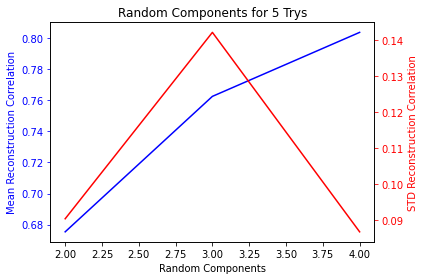

In [135]:
X_cc_standardized = StandardScaler().fit_transform(X_cc)
run_RP(X_cc_standardized)

2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4
5 0
5 1
5 2
5 3
5 4
6 0
6 1
6 2
6 3
6 4
7 0
7 1
7 2
7 3
7 4
8 0
8 1
8 2
8 3
8 4
9 0
9 1
9 2
9 3
9 4
10 0
10 1
10 2
10 3
10 4
11 0
11 1
11 2
11 3
11 4
12 0
12 1
12 2
12 3
12 4
13 0
13 1
13 2
13 3
13 4
14 0
14 1
14 2
14 3
14 4
15 0
15 1
15 2
15 3
15 4
16 0
16 1
16 2
16 3
16 4
17 0
17 1
17 2
17 3
17 4
18 0
18 1
18 2
18 3
18 4
19 0
19 1
19 2
19 3
19 4
20 0
20 1
20 2
20 3
20 4
21 0
21 1
21 2
21 3
21 4
22 0
22 1
22 2
22 3
22 4
23 0
23 1
23 2
23 3
23 4


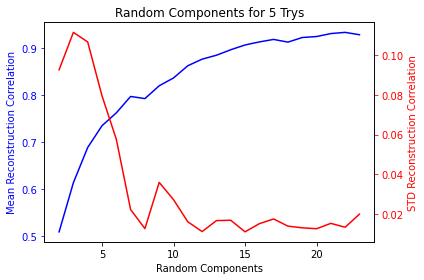

In [136]:
X_hotel_standardized = StandardScaler().fit_transform(X_hotel)
run_RP(X_hotel_standardized)

## Removing features with low variance method 

In [148]:
sel = VarianceThreshold(threshold=(5))

In [149]:
new_cc_data = sel.fit_transform(X_cc)

In [150]:
new_cc_data.shape

(660, 3)

In [151]:
cc_data.shape

(660, 7)

In [156]:
new_cc_df = pd.DataFrame(new_cc_data, columns=['Avg_Credit_Limit', 'Total_visits_online', 'Total_calls_made'])

In [157]:
new_cc_df.head()

,Avg_Credit_Limit,Total_visits_online,Total_calls_made
0,100000,1,0
1,50000,10,9
2,50000,3,4
3,30000,1,4
4,100000,12,3


## L1-based feature selection 

X_hotel, y_hotel

In [158]:
X_hotel.shape

(23878, 24)

In [159]:
y_hotel.shape

(23878, 1)

In [160]:
lsvc = LinearSVC(C=0.01, penalty='l1', dual=False).fit(X_hotel, y_hotel)

/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [161]:
model = SelectFromModel(lsvc, prefit=True)

In [163]:
X_new = model.transform(X_hotel)
X_new.shape

(23878, 14)

In [165]:
X_hotel_new_df = pd.DataFrame(X_new)

In [166]:
X_hotel_new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,4.0,19.0,6.0,3.0,2.0,0.0,1.0,0.0,0.0,0.562798,0.0,0.0,0.0
1,0.0,7.0,35.0,31.0,2.0,2.0,0.0,1.0,0.0,0.0,0.225755,0.0,0.0,0.0
2,0.0,7.0,34.0,17.0,5.0,2.0,0.0,1.0,2.0,2.0,0.483307,0.0,0.0,0.0
3,0.0,4.0,22.0,28.0,2.0,2.0,0.0,2.0,0.0,0.0,0.007949,0.0,0.0,0.2
4,0.0,7.0,35.0,26.0,5.0,2.0,0.0,1.0,2.0,2.0,0.497615,0.0,0.0,0.0


## Reproduce clustering experiments - K-means

In [169]:
pca_cc_df = PCA(n_components=3, random_state=1).fit_transform(X_cc)
ica_cc_df = ICA(n_components=3,random_state=1).fit_transform(X_cc)
rca_cc_df = ICA(n_components=3,random_state=5).fit_transform(X_cc)
# new_cc_df 

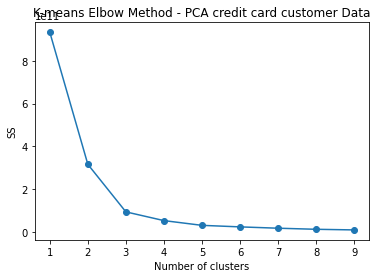

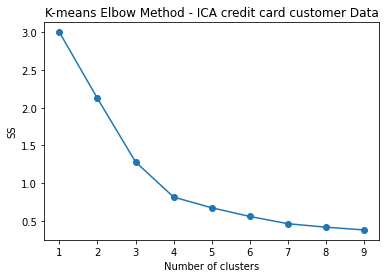

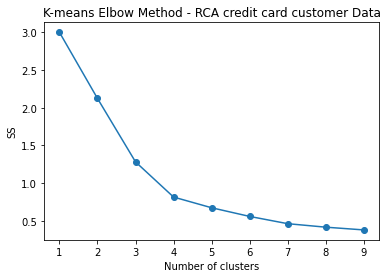

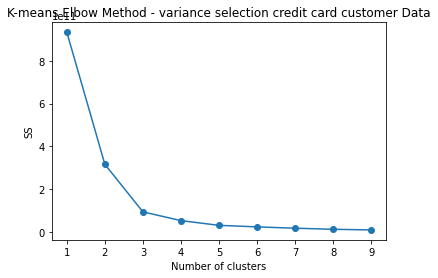

In [183]:
run_k_means(pca_cc_df,'PCA credit card customer Data')
run_k_means(ica_cc_df,'ICA credit card customer Data')
run_k_means(rca_cc_df,'RCA credit card customer Data')
run_k_means(new_cc_df,'variance selection credit card customer Data')

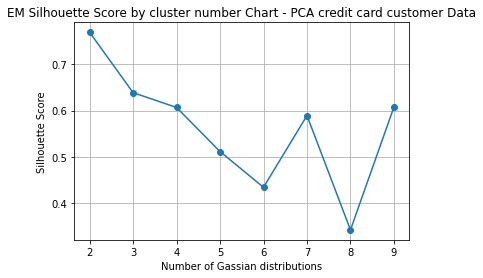

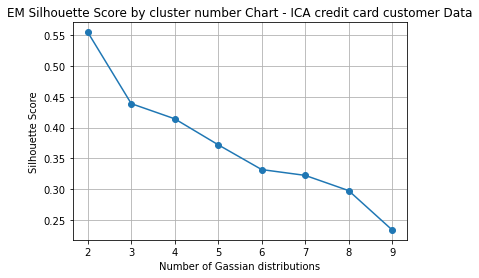

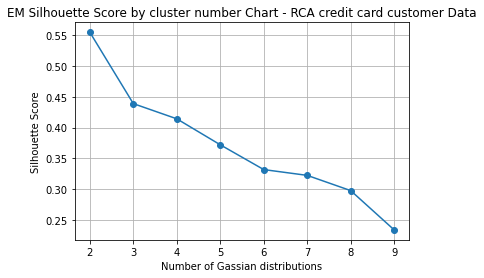

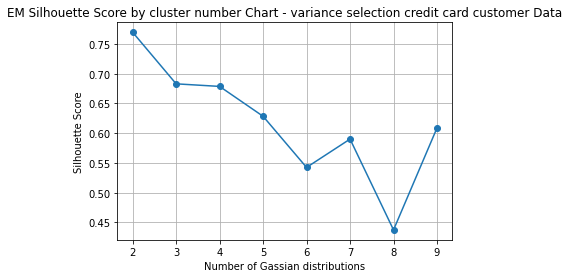

In [184]:
run_em(pca_cc_df,'PCA credit card customer Data')
run_em(ica_cc_df,'ICA credit card customer Data')
run_em(rca_cc_df,'RCA credit card customer Data')
run_em(new_cc_df,'variance selection credit card customer Data')

In [263]:
pca_hotel_df = PCA(n_components=15, random_state=1).fit_transform(X_hotel)
ica_hotel_df = ICA(n_components=20,random_state=1).fit_transform(X_hotel)
rca_hotel_df = ICA(n_components=5,random_state=5).fit_transform(X_hotel)
# X_hotel_new_df

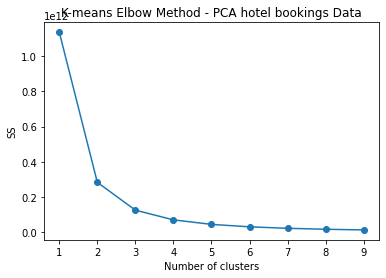

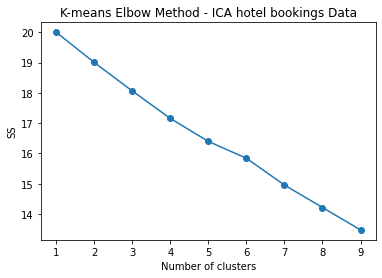

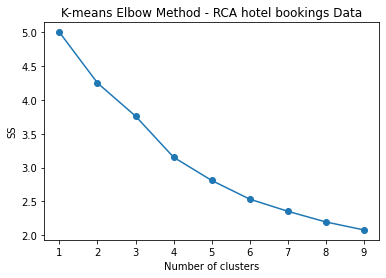

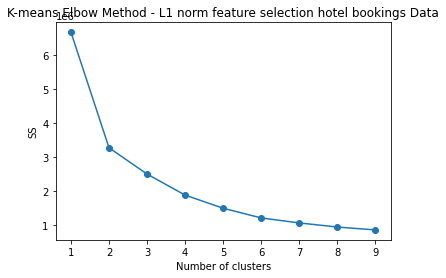

In [264]:
run_k_means(pca_hotel_df,'PCA hotel bookings Data')
run_k_means(ica_hotel_df,'ICA hotel bookings Data')
run_k_means(rca_hotel_df,'RCA hotel bookings Data')
run_k_means(X_hotel_new_df,'L1 norm feature selection hotel bookings Data')

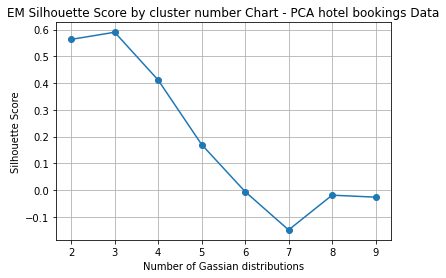

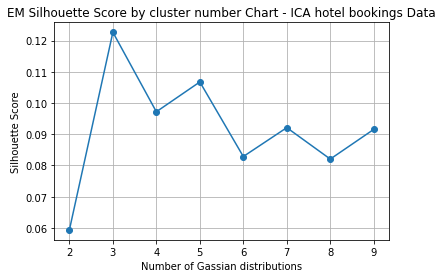

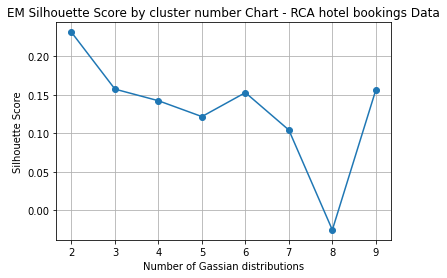

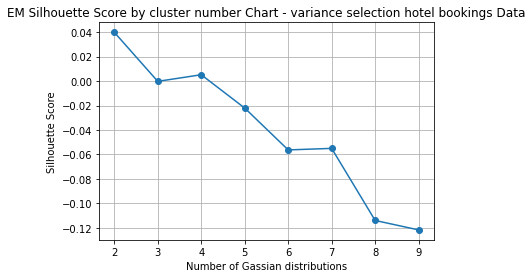

In [265]:
run_em(pca_hotel_df,'PCA hotel bookings Data')
run_em(ica_hotel_df,'ICA hotel bookings Data')
run_em(rca_hotel_df,'RCA hotel bookings Data')
run_em(X_hotel_new_df,'variance selection hotel bookings Data')

## Rerun your neural network learner on the newly projected data.

pca_hotel_df 

ica_hotel_df 

rca_hotel_df

X_hotel_new_df

In [190]:
len(y_hotel)

23878

In [193]:
print(pca_hotel_df.shape, ica_hotel_df.shape, rca_hotel_df.shape, X_hotel_new_df.shape)

(23878, 15) (23878, 20) (23878, 5) (23878, 14)


In [194]:
X_pca_hotel_train, X_pca_hotel_test, y_hotel_train, y_hotel_test = train_test_split(pca_hotel_df, y_hotel, test_size = 0.3, random_state =0)
X_ica_hotel_train, X_ica_hotel_test, y_hotel_train, y_hotel_test = train_test_split(ica_hotel_df, y_hotel, test_size = 0.3, random_state =0)
X_rca_hotel_train, X_rca_hotel_test, y_hotel_train, y_hotel_test = train_test_split(rca_hotel_df, y_hotel, test_size = 0.3, random_state =0)
X_var_hotel_train, X_var_hotel_test, y_hotel_train, y_hotel_test = train_test_split(X_hotel_new_df, y_hotel, test_size = 0.3, random_state =0)


In [196]:
%%time
param_grid = {
    'hidden_layer_sizes': [(16, 16), (16, 32), (32, 32), (32, 64), (64, 64), (64, 128)],
    "alpha" : [0.1, 0.001, 0.0001],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
search_credit_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=128), param_grid, cv=5, n_jobs=-1, verbose=3)
search_credit_mlp.fit(X_pca_hotel_train, y_hotel_train)

y_hotel_pred = search_credit_mlp.predict(X_pca_hotel_test)

accuracy_credit = accuracy_score(y_hotel_test, y_hotel_pred)
print("===========================================")
print("Classification Report for Hotel Bookings Cancellation Prediction")
print(accuracy_credit)
print(classification_report(y_hotel_test, y_hotel_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.4min finished
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Classification Report for Hotel Bookings Cancellation Prediction
0.6750418760469011
              precision    recall  f1-score   support

           0       0.66      0.99      0.79      4469
           1       0.94      0.15      0.25      2695

    accuracy                           0.68      7164
   macro avg       0.80      0.57      0.52      7164
weighted avg       0.76      0.68      0.59      7164

CPU times: user 6.51 s, sys: 242 ms, total: 6.75 s
Wall time: 1min 24s


In [197]:
%%time
param_grid = {
    'hidden_layer_sizes': [(16, 16), (16, 32), (32, 32), (32, 64), (64, 64), (64, 128)],
    "alpha" : [0.1, 0.001, 0.0001],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
search_credit_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=128), param_grid, cv=5, n_jobs=-1, verbose=3)
search_credit_mlp.fit(X_ica_hotel_train, y_hotel_train)

y_hotel_pred = search_credit_mlp.predict(X_ica_hotel_test)

accuracy_credit = accuracy_score(y_hotel_test, y_hotel_pred)
print("===========================================")
print("Classification Report for Hotel Bookings Cancellation Prediction")
print(accuracy_credit)
print(classification_report(y_hotel_test, y_hotel_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  3.7min finished
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Classification Report for Hotel Bookings Cancellation Prediction
0.7733109994416527
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      4469
           1       0.85      0.48      0.62      2695

    accuracy                           0.77      7164
   macro avg       0.80      0.72      0.73      7164
weighted avg       0.79      0.77      0.76      7164

CPU times: user 19.9 s, sys: 529 ms, total: 20.5 s
Wall time: 3min 46s


In [198]:
%%time
param_grid = {
    'hidden_layer_sizes': [(16, 16), (16, 32), (32, 32), (32, 64), (64, 64), (64, 128)],
    "alpha" : [0.1, 0.001, 0.0001],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
search_credit_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=128), param_grid, cv=5, n_jobs=-1, verbose=3)
search_credit_mlp.fit(X_rca_hotel_train, y_hotel_train)

y_hotel_pred = search_credit_mlp.predict(X_rca_hotel_test)

accuracy_credit = accuracy_score(y_hotel_test, y_hotel_pred)
print("===========================================")
print("Classification Report for Hotel Bookings Cancellation Prediction")
print(accuracy_credit)
print(classification_report(y_hotel_test, y_hotel_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 22.8min finished
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Classification Report for Hotel Bookings Cancellation Prediction
0.7406476828587382
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      4469
           1       0.99      0.31      0.48      2695

    accuracy                           0.74      7164
   macro avg       0.85      0.66      0.65      7164
weighted avg       0.81      0.74      0.70      7164

CPU times: user 7min 58s, sys: 5.45 s, total: 8min 3s
Wall time: 23min 48s


In [199]:
%%time
param_grid = {
    'hidden_layer_sizes': [(16, 16), (16, 32), (32, 32), (32, 64), (64, 64), (64, 128)],
    "alpha" : [0.1, 0.001, 0.0001],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
search_credit_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=128), param_grid, cv=5, n_jobs=-1, verbose=3)
search_credit_mlp.fit(X_var_hotel_train, y_hotel_train)

y_hotel_pred = search_credit_mlp.predict(X_var_hotel_test)

accuracy_credit = accuracy_score(y_hotel_test, y_hotel_pred)
print("===========================================")
print("Classification Report for Hotel Bookings Cancellation Prediction")
print(accuracy_credit)
print(classification_report(y_hotel_test, y_hotel_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  7.8min finished
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Classification Report for Hotel Bookings Cancellation Prediction
0.7963428252372976
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      4469
           1       0.81      0.60      0.69      2695

    accuracy                           0.80      7164
   macro avg       0.80      0.76      0.77      7164
weighted avg       0.80      0.80      0.79      7164

CPU times: user 2min 42s, sys: 2.17 s, total: 2min 44s
Wall time: 8min 7s


## Treat the clustering label as new features and run neural network learner

In [216]:
X_hotel.head()

,hotel,arrival_date_month_new,arrival_date_week_number,arrival_date_day_of_month,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,deposit_type,customer_type,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,cluster_0,cluster_1,cluster_2
0,1,4,19,6,3,2,0,1,0,0,...,0.000000,0.0,0.0,0.0,0.006956,0.0,0.0,0,0,1
1,0,7,35,31,2,2,0,1,0,0,...,0.000000,0.0,0.0,0.0,0.015944,0.0,0.0,0,0,1
2,0,7,34,17,5,2,0,1,2,2,...,0.038462,0.0,0.0,0.0,0.011481,0.0,0.0,0,0,1
3,0,4,22,28,2,2,0,2,0,0,...,0.000000,0.0,0.0,0.0,0.024648,0.0,0.2,0,0,1
4,0,7,35,26,5,2,0,1,2,2,...,0.038462,0.0,0.0,0.0,0.011481,0.0,0.0,0,0,1


In [217]:
y_hotel.head()

,is_canceled
0,0
1,0
2,1
3,0
4,1


In [218]:
X_c_hotel_train, X_c_hotel_test, y_c_hotel_train, y_c_hotel_test = train_test_split(X_hotel, y_hotel, test_size = 0.3, random_state =0)

In [219]:
%%time
param_grid = {
    'hidden_layer_sizes': [(16, 16), (16, 32), (32, 32), (32, 64), (64, 64), (64, 128)],
    "alpha" : [0.1, 0.001, 0.0001],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
search_credit_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=128), param_grid, cv=5, n_jobs=-1, verbose=3)
search_credit_mlp.fit(X_c_hotel_train, y_c_hotel_train)

y_hotel_pred = search_credit_mlp.predict(X_c_hotel_test)

accuracy_credit = accuracy_score(y_c_hotel_test, y_hotel_pred)
print("===========================================")
print("Classification Report for Hotel Bookings Cancellation Prediction")
print(accuracy_credit)
print(classification_report(y_c_hotel_test, y_hotel_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.6min finished
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Classification Report for Hotel Bookings Cancellation Prediction
0.39335566722501397
              precision    recall  f1-score   support

           0       0.78      0.04      0.07      4469
           1       0.38      0.98      0.55      2695

    accuracy                           0.39      7164
   macro avg       0.58      0.51      0.31      7164
weighted avg       0.63      0.39      0.25      7164

CPU times: user 16.2 s, sys: 653 ms, total: 16.8 s
Wall time: 1min 38s


In [231]:
X_hotel_em_feature.shape

(23878, 25)

In [232]:
y_hotel.shape

(23878, 1)

In [233]:
X_em_hotel_train, X_em_hotel_test, y_em_hotel_train, y_em_hotel_test = train_test_split(X_hotel_em_feature, y_hotel, test_size = 0.3, random_state =0)

In [234]:
%%time
param_grid = {
    'hidden_layer_sizes': [(16, 16), (16, 32), (32, 32), (32, 64), (64, 64), (64, 128)],
    "alpha" : [0.1, 0.001, 0.0001],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
search_credit_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=128), param_grid, cv=5, n_jobs=-1, verbose=3)
search_credit_mlp.fit(X_em_hotel_train, y_em_hotel_train)

y_hotel_pred = search_credit_mlp.predict(X_em_hotel_test)

accuracy_credit = accuracy_score(y_em_hotel_test, y_hotel_pred)
print("===========================================")
print("Classification Report for Hotel Bookings Cancellation Prediction")
print(accuracy_credit)
print(classification_report(y_em_hotel_test, y_hotel_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.7min finished
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Classification Report for Hotel Bookings Cancellation Prediction
0.7389726409826912
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      4469
           1       0.95      0.32      0.48      2695

    accuracy                           0.74      7164
   macro avg       0.83      0.66      0.65      7164
weighted avg       0.80      0.74      0.70      7164

CPU times: user 15 s, sys: 617 ms, total: 15.7 s
Wall time: 1min 43s
